# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 380.8MB 40kB/s 
     |████████████████████████████████| 3.8MB 41.2MB/s 
     |████████████████████████████████| 450kB 68.7MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [ ]:
# importing the dataset
from google.colab import files
uploaded = files.upload()

Saving test_set.csv to test_set.csv
Saving training_set.csv to training_set.csv


In [ ]:
training_data = pd.read_csv('/content/training_set.csv')

In [ ]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-03,553.979065,556.372498,551.715271,553.699829,553.699829,1382200
1,2014-11-04,551.485901,553.979065,547.796021,552.592834,552.592834,1244200
2,2014-11-05,555.275513,555.275513,542.560425,544.425293,544.425293,2032200
3,2014-11-06,544.006409,545.387634,539.488831,540.555908,540.555908,1333200
4,2014-11-07,544.714478,544.714478,537.195129,539.528748,539.528748,1633700


In [ ]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2019-10-24,1260.900024,1264.000000,1253.714966,1260.989990,1260.989990,1028100
1253,2019-10-25,1251.030029,1269.599976,1250.010010,1265.130005,1265.130005,1213100
1254,2019-10-28,1275.449951,1299.310059,1272.540039,1290.000000,1290.000000,2613200
1255,2019-10-29,1276.229980,1281.589966,1257.212036,1262.619995,1262.619995,1886400
1256,2019-10-30,1252.969971,1269.359985,1252.000000,1261.290039,1261.290039,1408900


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
Date         1257 non-null object
Open         1257 non-null float64
High         1257 non-null float64
Low          1257 non-null float64
Close        1257 non-null float64
Adj Close    1257 non-null float64
Volume       1257 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
training_set = training_data.iloc[:, 1:2].values

In [ ]:
training_set.shape, training_data.shape

((1257, 1), (1257, 7))

In [ ]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.07750766],
       [0.07432328],
       [0.07916355],
       ...,
       [0.99900371],
       [1.        ],
       [0.97029124]])

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1257):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

# converting x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.07750766, 0.07432328, 0.07916355, ..., 0.04498879, 0.03583056,
        0.0208258 ],
       [0.07432328, 0.07916355, 0.06477013, ..., 0.03583056, 0.0208258 ,
        0.02701621],
       [0.07916355, 0.06477013, 0.0656745 , ..., 0.0208258 , 0.02701621,
        0.0472306 ],
       ...,
       [0.90358069, 0.86436929, 0.85577344, ..., 0.95673967, 0.98041987,
        0.96781345],
       [0.86436929, 0.85577344, 0.8464367 , ..., 0.98041987, 0.96781345,
        0.99900371],
       [0.85577344, 0.8464367 , 0.88070516, ..., 0.96781345, 0.99900371,
        1.        ]])

In [ ]:
y_train

array([0.02701621, 0.0472306 , 0.04247951, ..., 0.99900371, 1.        ,
       0.97029124])

In [ ]:
x_train.shape

(1197, 60)

In [ ]:
# reshaping dataset
x_train = x_train.reshape(1197, 60, 1)

In [ ]:
x_train.shape

(1197, 60, 1)

# Step 3: Building LSTM

In [ ]:
# define an object (inilitizing RNN)
model = tf.keras.models.Sequential()

In [ ]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Training the model

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Train on 1197 samples
Epoch 1/100
1197/1197 [==============================] - 12s 10ms/sample - loss: 0.0772
Epoch 2/100
1197/1197 [==============================] - 7s 6ms/sample - loss: 0.0075
Epoch 3/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0056
Epoch 4/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0058
Epoch 5/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0058
Epoch 6/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0055
Epoch 7/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0051
Epoch 8/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0059
Epoch 9/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0046
Epoch 10/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0048
Epoch 11/100
1197/1197 [==============================] - 8s 6ms/sample - loss: 0.0047
Epoch 12/100
1197/1197 [====

# Step 5: Making Predictions

In [ ]:
# getting the real stock prices of month Nov 2019
test_data = pd.read_csv('/content/test_set.csv')

In [ ]:
test_data.shape

(20, 7)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date         20 non-null object
Open         20 non-null float64
High         20 non-null float64
Low          20 non-null float64
Close        20 non-null float64
Adj Close    20 non-null float64
Volume       20 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
real_stock_price = test_data.iloc[:, 1:2].values

In [ ]:
real_stock_price.shape

(20, 1)

In [ ]:
# Getting predicted stock prices of month Nov 2019

# concatination
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)

# stock prices of previous 60 days for each day of Nov 2019
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

# reshape (convert into numpy array)
inputs = inputs.reshape(-1,1)

# feature scaling
inputs = sc.transform(inputs)

# creating a test set

x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])

# convert in numpy array
x_test = np.array(x_test)

# convert in 3D (required to process)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# getting predicted stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
print(predicted_stock_price[5]), print(real_stock_price[5])

[1230.0573]
[1305.280029]


(None, None)

# Step 6: Visualization

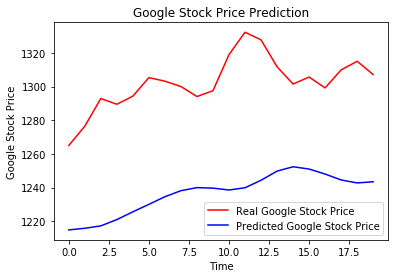

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()